In [1]:
from utils import jupyter_style

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
jupyter_style()

In [2]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Tesseract-OCR'

## Mosex

In [3]:
import cv2
import numpy as np
from mosex import mosex
from ocr import *
iis=mosex()


In [ ]:
#http://iss.moex.com/iss/securities.json
#from pytesseract.pytesseract import tesseract_cmd 

### Security specification

In [6]:
iis.get_security_spec('MOEX')

,name,title,value,type,sort_order,is_hidden,precision
0,SECID,Код ценной бумаги,MOEX,string,1,0,NaN
1,NAME,Полное наименование,ПАО Московская Биржа,string,3,0,NaN
2,SHORTNAME,Краткое наименование,МосБиржа,string,4,0,NaN
3,ISIN,ISIN код,RU000A0JR4A1,string,5,0,NaN
4,REGNUMBER,Номер государственной регистрации,1-05-08443-H,string,6,0,NaN
5,ISSUESIZE,Объем выпуска,2276401458,number,7,0,0.0
6,FACEVALUE,Номинальная стоимость,1,number,8,0,2.0
7,FACEUNIT,Валюта номинала,SUR,string,9,0,NaN
8,ISSUEDATE,Дата начала торгов,2013-02-04,date,10,0,NaN
9,LATNAME,Английское наименование,MoscowExchange,string,11,1,NaN


### Index list

In [7]:
index_list=iis.get_index_list()
index_list.head(3)

,indexid,shortname,from,till,dollar,actual_flg
0,IMOEX,Индекс МосБиржи,2001-01-03,2019-02-26,False,True
1,MOEX10,Индекс МосБиржи 10,2008-05-27,2019-02-26,False,True
2,RTSI,Индекс РТС,2009-09-30,2019-02-26,True,True


In [8]:
print(max(index_list.till))
index_list[(index_list.actual_flg==True)&(index_list.dollar==True)]

2019-02-26 00:00:00


,indexid,shortname,from,till,dollar,actual_flg
2,RTSI,Индекс РТС,2009-09-30,2019-02-26,True,True
41,RUBMI,Индекс РТС широкого рынка,2013-05-20,2019-02-26,True,True
64,RTSFN,Индекс РТС финансов,2009-09-30,2019-02-26,True,True
73,RTSOG,Индекс РТС нефти и газа,2009-09-30,2019-02-26,True,True
85,RTSMM,Индекс РТС металлов и добычи,2009-09-30,2019-02-26,True,True
100,RTSCR,Индекс РТС потреб. сектора,2009-09-30,2019-02-26,True,True
102,RTSEU,Индекс РТС электроэнергетики,2009-09-30,2019-02-26,True,True
104,RTSTN,Индекс РТС транспорта,2013-05-20,2019-02-26,True,True
120,RTSCH,Индекс РТС химии и нефтехимии,2013-05-20,2019-02-26,True,True
129,RTSTL,Индекс РТС телекоммуникаций,2009-09-30,2019-02-26,True,True


  ## Таблицы
  ### Stock_indices
  **поле** | **комментарий**
   ------------- | -------------|
 uk| ключ(PK)
uk_descr| расшифрока индекса
source_link|источник данных(web)
 bloomberg_id| код Bloomberg
reuters_id| код Reuters
 isin_id| код ISIN
calc_type| тип индекса,например:Ценовой, взвешенный по капитализации 
 calc_period| Время расчета (Московское время)
 periodicity|Периодичность расчета Индекса
 fist_calc|Начало расчета
 firs_value|Начальное значение
 weight_limit|Ограничение на вес одного эмитента
 update_campanies_list|Сроки изменения списка индекса
 history_begin| Доступная история

In [9]:
import pandas as pd
def plot_index(index):
    hist=iis.security_hist(index,'stock','index',n_threads=1,date_from='2016-01-01')

    hist['TRADEDATE']=pd.to_datetime(hist['TRADEDATE'])
    hist.set_index('TRADEDATE',inplace=True)
    hist['CLOSE'].plot(figsize=(15,4),title=hist.NAME.iloc[0]); 

In [ ]:
d=iis.security_hist('RTSog','stock','index',n_threads=1,date_from='2016-01-01')

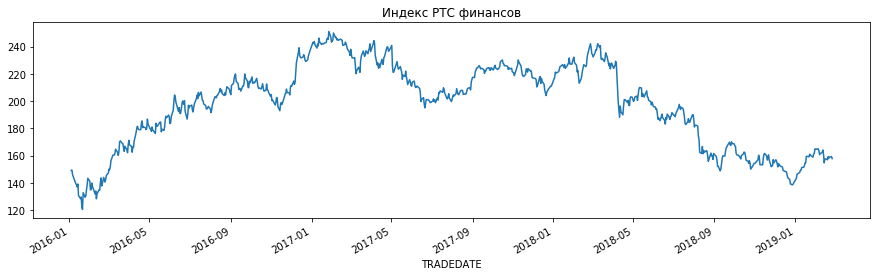

In [10]:
plot_index('RTSFN')

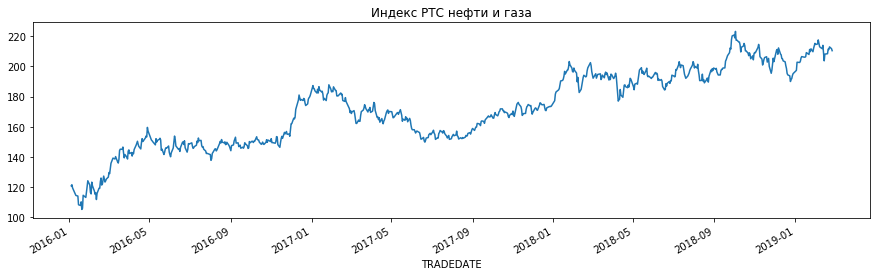

In [11]:
plot_index('RTSOG')

In [ ]:
plot_index('RTSMM')

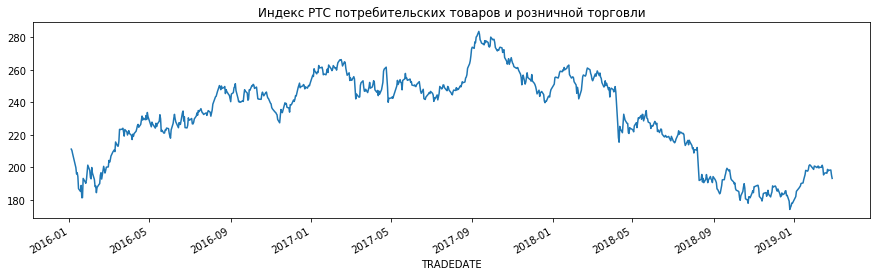

In [162]:
plot_index('RTSCR')

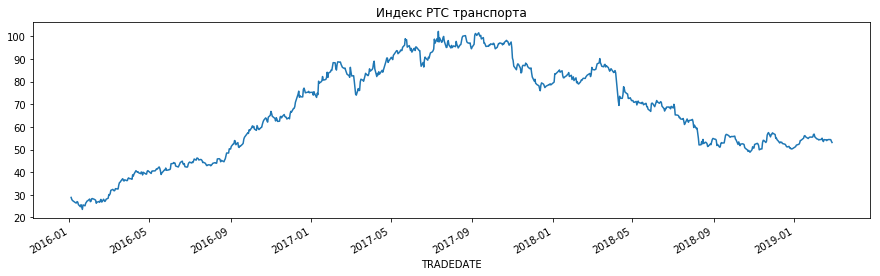

In [158]:
plot_index('RTSTN')

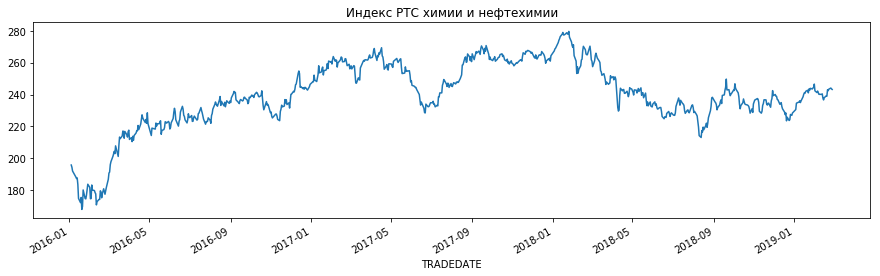

In [154]:
plot_index('RTSCH')  

In [ ]:
plot_index('RTSEU')

In [ ]:
plot_index('RTSTL')

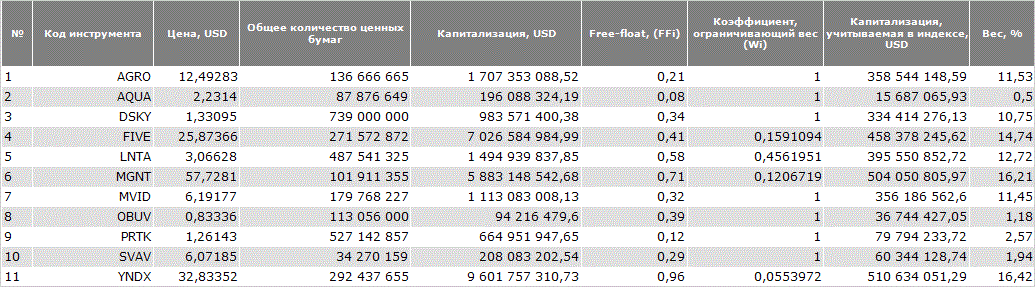

In [163]:
#t=ocr.download_image(r'https://informer.moex.com/ru/index/constituents-MICEXO&G-20190111.gif')  
t=ocr.download_image('https://informer.moex.com/ru/index/constituents-RTSCR-20190227.gif')
t

In [164]:
k=iis.industry_indices_list(t)
k

[<PIL.Image.Image image mode=P size=113x20 at 0x17178C25BE0>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25C50>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25828>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25DD8>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25E80>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25D68>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25940>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25EF0>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25978>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25D30>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178C25A20>]

In [174]:
for el in k:
    print(image_to_string(noise(convert_RGB_to_BGRarray(el),blur= False,dilate=(2,1) ,canny=False)),
          image_to_string(noise(convert_RGB_to_BGRarray(el),blur= False,dilate=(1,1) ,canny=False)),
         image_to_string(noise(convert_RGB_to_BGRarray(el),blur= False,dilate=(2,2) ,canny=False)),
          image_to_string(noise(convert_RGB_to_BGRarray(el),blur= False,dilate=(1,2) ,canny=False,erode=(1,2)))
         )


AGRO AGRO  AGRO
AQUA AQUA  AQUA
DSKV DSKV DSKV DSKV
FIVE FIVE  
LNTA LNTA  mm
MGNT MGNT MGNT MGNT
MVID MVID  MVID
aauv oauv aauv oauv
PRTK mam  mm
stv SVAV stv sww
vNDx VNDX vNDx YNDX


[<PIL.Image.Image image mode=P size=113x20 at 0x17178D6D2B0>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6D2E8>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6DDD8>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6D240>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6D978>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6DEF0>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6DC50>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6D438>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6DC88>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6D128>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6D940>,
 <PIL.Image.Image image mode=P size=113x20 at 0x17178D6D5C0>]

In [19]:
def convert_RGB_to_BGRarray(img):
    img_array=np.array(img.convert('RGB'))
    return img_array[:, :, ::-1]

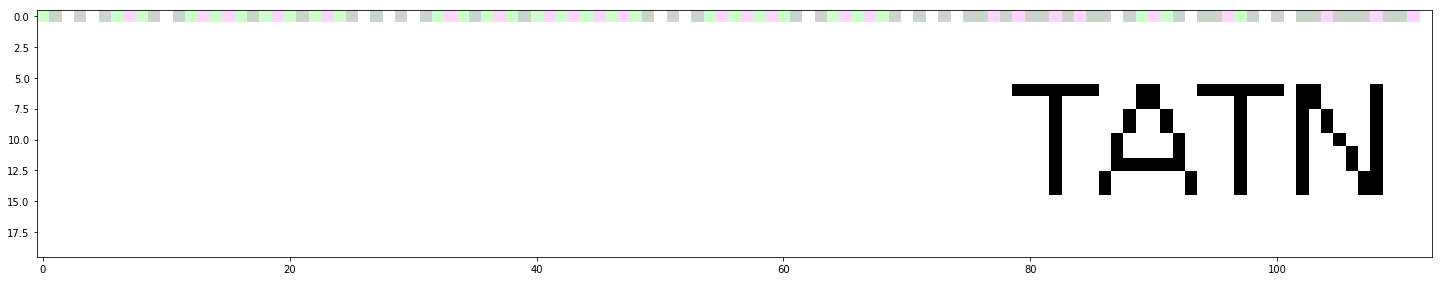

In [21]:
plt.figure(figsize=(25,20))
plt.imshow(convert_RGB_to_BGRarray(k[-4]))

oauv


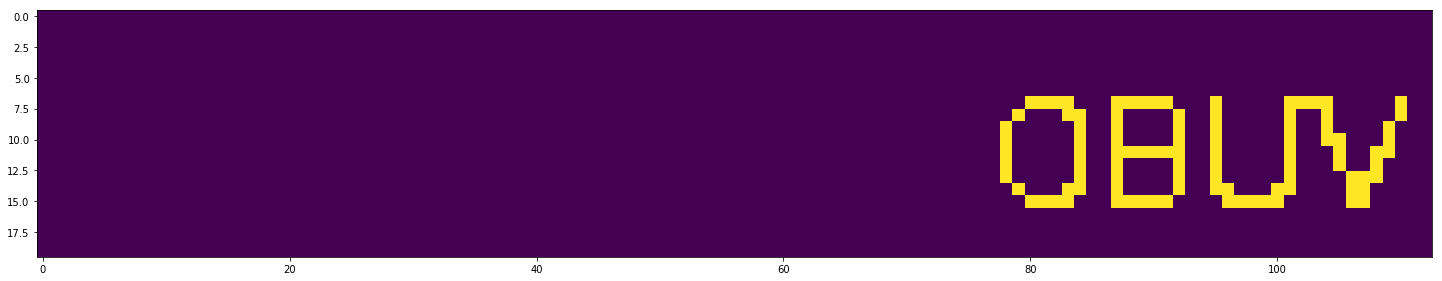

In [187]:
def noise(img,thresh= (175,255),blur= False,dilate = (1,1),canny=(100,200),erode=(1,1)):
     # Конвертируем цветное изображение в монохромное 
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if thresh:
        img_gray = cv2.threshold(img_gray, *thresh, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    #Otsu algorithm to choose the optimal threshold value; при данном флаге  175, 255, cv2.THRESH_BINARY игнорируются
    ;
    if blur:
        img_gray = cv2.medianBlur(img_gray, 3)
    
    img_gray = cv2.bitwise_not(img_gray)

    if dilate:
        #img_gray = cv2.bitwise_not(img_gray)
        kernel = np.ones(dilate, np.uint8)
        img_gray = cv2.dilate(img_gray, kernel, iterations=1) #cv2.morphologyEx(img_gray, cv2.MORPH_DILATE, kernel)
        #img_gray = cv2.bitwise_not(img_gray)
    if erode:
        kernel=np.ones(erode, np.uint8)
        img_gray=cv2.erode(img_gray, kernel, iterations=1)   
    if canny:
        img_gray=cv2.Canny(img_gray, *canny)
    # Детектируем ребра (фильтр канни)

    return img_gray
converted_img=noise(convert_RGB_to_BGRarray(k[-4]),blur= False,dilate=(2,2) ,canny=False,erode=(2,2))
print(image_to_string(converted_img,lang='eng'))

plt.figure(figsize=(25,20))
plt.imshow(converted_img);

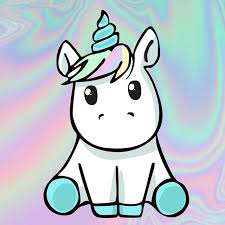

In [22]:
img=ocr.download_image('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyutTGIj6OwdhvR917rRFL7zs3C2tPGq21NaLg-v90LnmuV4L3nQ')
img

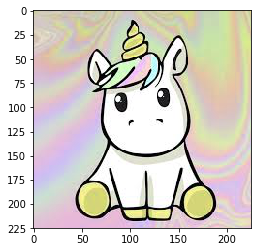

In [24]:
plt.imshow(convert_RGB_to_BGRarray(img));

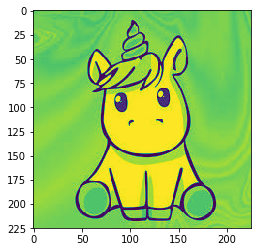

In [25]:
img_gray = cv2.cvtColor(convert_RGB_to_BGRarray(img), cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray);

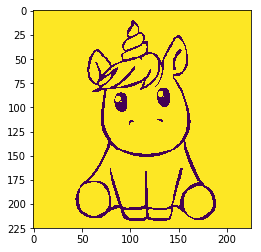

In [58]:
trash=(255,255)
plt.imshow(cv2.threshold(img_gray, *trash, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]);

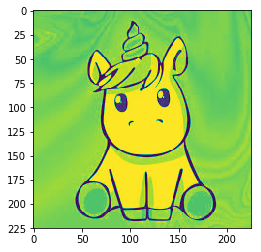

In [59]:
kernel = np.ones((2, 1), np.uint8)
plt.imshow(cv2.morphologyEx(img_gray, cv2.MORPH_DILATE, kernel))

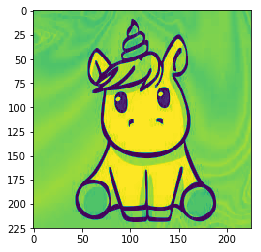

In [131]:
kernel = np.ones((3, 1), np.uint8)
plt.imshow(cv2.erode(img_gray, kernel, iterations=1))

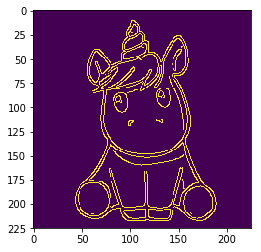

In [57]:
plt.imshow(cv2.Canny(img_gray, 100, 200)) # Детектируем ребра 

In [ ]:
    def recognize_text(self,img):
        file = BytesIO()
        img_converted = img.filter(ImageFilter.MedianFilter())
        enhancer = ImageEnhance.Contrast(img_converted)
        img_converted=enhancer.enhance(2)
        
        img_converted=img_converted.convert('1')
        img_converted.save(file, 'png')
        img_converted= Image.open(file)
        return image_to_string(img_converted,lang='eng')

In [ ]:
from PIL import Image, ImageEnhance, ImageFilter

im = Image.open("temp.jpg") # the second one 
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)

im = enhancer.enhance(2)
im = im.convert('1')
im.save('temp2.jpg')
text = pytesseract.image_to_string(Image.open('temp2.jpg'))
print(text)

In [ ]:
k[-5].convert('1')

In [ ]:
[iis.recognize_text(el)   for el in k ]

In [ ]:
kk=k[3].crop((100,0,113,20))
kk.convert('1').resize((200,200))

In [ ]:
k[3]

In [ ]:

img=k[-5].convert('RGB')
k[-5].convert('1')

In [ ]:
img=img.filter(ImageFilter.SHARPEN)

img.convert('1')

In [ ]:
    def recognize_text(img):
        file = BytesIO()
        img_converted=img.convert('1').resize((200,200))
        img_converted.save(file, 'png')
        img_converted= Image.open(file)
        return image_to_string(img_converted,lang='rus')
recognize_text(kk)

In [ ]:
enhancer = ImageEnhance.Contrast(img)
img_converted=enhancer.enhance(11)
img_converted.convert('1')

In [ ]:
from pytesseract import image_to_string
from PIL import Image,ImageEnhance,ImageFilter
from io import BytesIO
def recognize_text(img):
    file = BytesIO()
    img=img.convert('RGB')
    img=ImageEnhance.Sharpness (img.convert('RGB'))
    img_converted = img.filter(ImageFilter.MedianFilter())
    enhancer = ImageEnhance.Contrast(img_converted)
    img_converted=enhancer.enhance(2)
    
    img_converted=img_converted.convert('1')
    img_converted.save(file, 'png')
    img_converted= Image.open(file)
    return image_to_string(img_converted,lang='eng')

In [ ]:
[recognize_text(el)   for el in k ]

In [ ]:
pytesseract.image_to_string(k[-1],lang='eng')

In [ ]:
type(k[1]),type(m),type(m1)

In [ ]:
m=k[-1].convert('1')

In [ ]:
l=k[-1].convert('RGB')

In [ ]:
pytesseract.image_to_string(m1,lang='eng')

In [ ]:
m.save('result.png')

In [ ]:
m1= Image.open("result.png")

In [ ]:
m

In [ ]:
pytesseract.image_to_string(m2,lang='eng')

In [ ]:
m

In [ ]:
np.unique(np.array(m))

In [ ]:
Image.fromarray(np.array(m))

In [ ]:
from io import BytesIO


In [ ]:
import psycopg2

In [ ]:
conn = psycopg2.connect(host="localhost",database="postgres", user="postgres", password="admin")

In [ ]:
# create a cursor
cur = conn.cursor()
cur.execute('SELECT version()')

In [ ]:
db_version = cur.fetchone()
db_version

In [ ]:
db_version

In [ ]:
cur.close()